## Importing important libraries

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from helper_functions import *

## Loading and preprocessing the dataset

In [2]:
X_train_orig, y_train_orig, X_test_orig, y_test_orig, classes = load_data()

**Exploring the Dataset**

In [3]:
m_train = X_train_orig.shape[0]
num_px = X_train_orig.shape[1]
m_test = X_test_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("X_train shape: " + str(X_train_orig.shape))
print ("y_train shape: " + str(y_train_orig.shape))
print ("X_test shape: " + str(X_test_orig.shape))
print ("y_test shape: " + str(y_test_orig.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
X_train shape: (209, 64, 64, 3)
y_train shape: (1, 209)
X_test shape: (50, 64, 64, 3)
y_test shape: (1, 50)


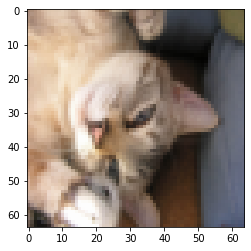

Well it's a cat image.


In [6]:
# Visualizing a random image from the dataset
index = np.random.randint(low=0, high=X_train_orig.shape[0])
_ = plt.imshow(X_train_orig[index])
plt.show()
print("Well it's a " + classes[y_train_orig[0,index]].decode("utf-8") +  " image.")

In [7]:
# Reshaping the training and test examples 
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

print ("X_train's shape: " + str(X_train.shape))
print ("X_test's shape: " + str(X_test.shape))

X_train's shape: (12288, 209)
X_test's shape: (12288, 50)


## Training a 4 layer neural network

I will be using RELU activation for the first three layers, and sigmoid activation for the last layer(Output layer)

In [8]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [9]:
def Four_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # For keeping track of cost
    
    # Initializing the Parameters
    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):

        # Performing forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Computing the cost.
        cost = compute_cost(AL, Y)
        
        # Performing backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Updating the parameters
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Printing the cost after every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [13]:
parameters, costs = Four_layer_model(X_train, y_train_orig, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822914
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.54013766345478
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.3691258524959279
Cost after iteration 900: 0.39174697434805344
Cost after iteration 1000: 0.3151869888600617
Cost after iteration 1100: 0.2726998441789385
Cost after iteration 1200: 0.23741853400268137
Cost after iteration 1300: 0.19960120532208647
Cost after iteration 1400: 0.18926300388463305
Cost after iteration 1500: 0.1611885466582775
Cost after iteration 1600: 0.14821389662363316
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.1297401754919012
Cost after iteration 1900: 0.12122535068005212
Cost after iteration 2000: 0.11382060668633712
Cost after iteration 2100: 0.1078392852

In [14]:
pred_train = predict(X_train, y_train_orig, parameters)

Accuracy: 0.9856459330143539


In [17]:
pred_test = predict(X_test, y_test_orig, parameters)

Accuracy: 0.8


Wow that's an 80% accuracy on unseen cat images